In [26]:
from bs4 import BeautifulSoup
import requests

In [27]:
url = 'https://finance.yahoo.com/crypto/?offset=0&count=100'
page=requests.get(url)

soup=BeautifulSoup(page.text, 'html')

In [28]:
#print(soup)

In [29]:
#Find the required table
table = soup.find_all('table')
#table

In [30]:
#Get the details of column headers in table
for row in table:
    column_headers = row.find_all('th') #titles

In [31]:
#column_headers

In [32]:
#Split the necessary column titles
column_titles = [title.text.strip() for title in column_headers] 
print(column_titles)


['Symbol', 'Name', 'Price (Intraday)', 'Change', '% Change', 'Market Cap', 'Volume in Currency (Since 0:00 UTC)', 'Volume in Currency (24Hr)', 'Total Volume All Currencies (24Hr)', 'Circulating Supply', '52 Week Range', 'Day Chart']


In [33]:
#store the column title to a dataframe
import pandas as pd
data=pd.DataFrame(columns=column_titles)

In [34]:
data

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,Day Chart


In [35]:
#Gather column data
for t in table: 
    column_data = t.find_all('tr')
    for row in column_data:
        pass
#column_data

In [36]:
#gather row data
for row in column_data[1:]:
    row_data=row.find_all('td')
    individual_row_data=[data.text.strip() for data in row_data]
    length=len(data)
    data.loc[length] = individual_row_data

In [37]:
data.head(5)

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,Day Chart
0,BTC-USD,Bitcoin USD,"51,816.28","+1,097.47",+2.16%,1.018T,15.54B,15.54B,15.54B,19.637M,,
1,ETH-USD,Ethereum USD,"3,033.10",+112.57,+3.85%,364.445B,11.312B,11.312B,11.312B,120.156M,,
2,USDT-USD,Tether USDt USD,0.999834,-0.000007,-0.00%,97.894B,33.515B,33.515B,33.515B,97.911B,,
3,BNB-USD,BNB USD,380.81,+6.42,+1.71%,56.947B,1.079B,1.079B,1.079B,149.543M,,
4,SOL-USD,Solana USD,103.82,+4.13,+4.14%,45.793B,1.008B,1.008B,1.008B,441.082M,,


In [38]:
#get data of other pages
for outer_row in table:
    nested_table = outer_row.find('table')
    if nested_table:
        nested_rows = nested_table.find_all('tr')
        for nested_row in nested_rows:
            pass
    else:
        pass


In [39]:
#Gather the new row data of other pages
for row in column_data[1:]:
    row_data=row.find_all('td')
    individual_row_data=[data.text.strip() for data in row_data]
    length=len(data)
    data.loc[length] = individual_row_data

In [40]:
data.head(50)

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply,52 Week Range,Day Chart
0,BTC-USD,Bitcoin USD,"51,816.28","+1,097.47",+2.16%,1.018T,15.54B,15.54B,15.54B,19.637M,,
1,ETH-USD,Ethereum USD,"3,033.10",+112.57,+3.85%,364.445B,11.312B,11.312B,11.312B,120.156M,,
2,USDT-USD,Tether USDt USD,0.999834,-0.000007,-0.00%,97.894B,33.515B,33.515B,33.515B,97.911B,,
3,BNB-USD,BNB USD,380.81,+6.42,+1.71%,56.947B,1.079B,1.079B,1.079B,149.543M,,
4,SOL-USD,Solana USD,103.82,+4.13,+4.14%,45.793B,1.008B,1.008B,1.008B,441.082M,,
5,XRP-USD,XRP USD,0.546746,+0.013019,+2.44%,29.849B,686.578M,686.578M,686.578M,54.594B,,
6,STETH-USD,Lido Staked ETH USD,"3,024.52",+106.50,+3.65%,29.655B,22.773M,22.773M,22.773M,9.805M,,
7,USDC-USD,USD Coin USD,0.999996,+0.000052,+0.01%,28.148B,3.014B,3.014B,3.014B,28.148B,,
8,ADA-USD,Cardano USD,0.599085,+0.024340,+4.23%,21.25B,371.785M,371.785M,371.785M,35.47B,,
9,AVAX-USD,Avalanche USD,36.84,+1.26,+3.56%,13.894B,334.856M,334.856M,334.856M,377.172M,,


In [41]:
#drop irrelevant axes
data.drop(['52 Week Range','Day Chart'], axis=1, inplace=True)

In [42]:
data.to_csv(r'/Users/apple/Desktop/webscrape_of_crypto_cleaned.csv', index=False)

In [43]:
def currency_converter(value):
    value_str = str(value).strip().upper().replace(',', '')  # Remove commas and convert to uppercase

    if value_str.endswith('B'):
        numeric_part = float(value_str[:-1])  # Remove 'B' and convert to float
        return numeric_part * 1e9  # Convert billion to units
    elif value_str.endswith('T'):
        numeric_part = float(value_str[:-1])
        return numeric_part * 1e12  # Convert trillion to units
    elif value_str.endswith('M'):
        numeric_part = float(value_str[:-1])
        return numeric_part * 1e6  # Convert million to units
    else:
        numeric_part = float(value_str)
        return numeric_part   # Return normal units


data['Market Cap'] = data['Market Cap'].apply(currency_converter)
data['Volume in Currency (Since 0:00 UTC)'] = data['Volume in Currency (Since 0:00 UTC)'].apply(currency_converter)
data['Volume in Currency (24Hr)'] = data['Volume in Currency (24Hr)'].apply(currency_converter)
data['Total Volume All Currencies (24Hr)'] = data['Total Volume All Currencies (24Hr)'].apply(currency_converter)
data['Circulating Supply'] = data['Circulating Supply'].apply(currency_converter)
data['% Change'] = data['% Change'].str.replace('%', '')


In [44]:
data

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply
0,BTC-USD,Bitcoin USD,"51,816.28","+1,097.47",+2.16,1.018000e+12,1.554000e+10,1.554000e+10,1.554000e+10,1.963700e+07
1,ETH-USD,Ethereum USD,"3,033.10",+112.57,+3.85,3.644450e+11,1.131200e+10,1.131200e+10,1.131200e+10,1.201560e+08
2,USDT-USD,Tether USDt USD,0.999834,-0.000007,-0.00,9.789400e+10,3.351500e+10,3.351500e+10,3.351500e+10,9.791100e+10
3,BNB-USD,BNB USD,380.81,+6.42,+1.71,5.694700e+10,1.079000e+09,1.079000e+09,1.079000e+09,1.495430e+08
4,SOL-USD,Solana USD,103.82,+4.13,+4.14,4.579300e+10,1.008000e+09,1.008000e+09,1.008000e+09,4.410820e+08
5,XRP-USD,XRP USD,0.546746,+0.013019,+2.44,2.984900e+10,6.865780e+08,6.865780e+08,6.865780e+08,5.459400e+10
6,STETH-USD,Lido Staked ETH USD,"3,024.52",+106.50,+3.65,2.965500e+10,2.277300e+07,2.277300e+07,2.277300e+07,9.805000e+06
7,USDC-USD,USD Coin USD,0.999996,+0.000052,+0.01,2.814800e+10,3.014000e+09,3.014000e+09,3.014000e+09,2.814800e+10
8,ADA-USD,Cardano USD,0.599085,+0.024340,+4.23,2.125000e+10,3.717850e+08,3.717850e+08,3.717850e+08,3.547000e+10
9,AVAX-USD,Avalanche USD,36.84,+1.26,+3.56,1.389400e+10,3.348560e+08,3.348560e+08,3.348560e+08,3.771720e+08


In [45]:
data.describe()

,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply
count,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01
mean,7.306964e+10,2.815121e+09,2.815121e+09,2.815121e+09,2.359397e+13
std,2.075007e+11,7.307874e+09,7.307874e+09,7.307874e+09,1.166446e+14
min,4.275000e+09,7.869770e+05,7.869770e+05,7.869770e+05,1.570610e+05
25%,6.712000e+09,1.128420e+08,1.128420e+08,1.128420e+08,1.495430e+08
50%,1.207900e+10,2.653760e+08,2.653760e+08,2.653760e+08,1.288000e+09
75%,2.965500e+10,1.008000e+09,1.008000e+09,1.008000e+09,3.547000e+10
max,1.018000e+12,3.351500e+10,3.351500e+10,3.351500e+10,5.892900e+14


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Volume in Currency (Since 0:00 UTC)', ylabel='Market Cap'>

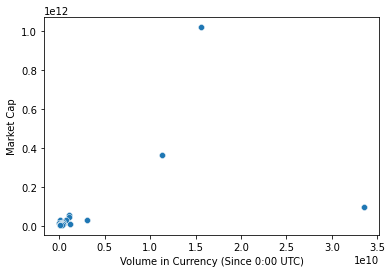

In [46]:
import seaborn as sns
sns.scatterplot(data['Volume in Currency (Since 0:00 UTC)'],data['Market Cap'])

**THE SCATTERPLOT ABOVE HAS OUTLIERS, IT'S BEST TO FIX THEM**

In [47]:
#USING LOG TRANSFORM TO FIX THE DATA
import numpy as np
a=data['Market Cap']
log_a=np.log(a)
log_a.min()

22.176049939335133

In [48]:
b=data['Volume in Currency (Since 0:00 UTC)']
log_b=np.log(b)
log_b.min()

13.575954302067784

**IT'S A LINEAR GRAPH, MOST OF THE DATA POINTS ARE CONCENTERATED IN THE LOW MARKET CAP-LOW VOLUME REGION**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Market Cap', ylabel='Volume in Currency (Since 0:00 UTC)'>

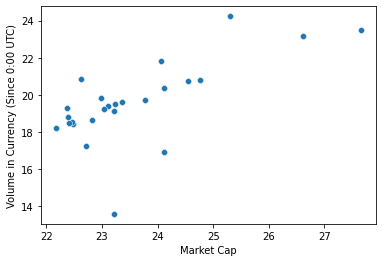

In [49]:
sns.scatterplot(log_a,log_b)

**TOP-TIER ASSET SELECTOR MODEL, BASED ON LIQUIDITY AND MARKET CAP**

In [51]:
high_market_cap_threshold = np.percentile(log_a, 60)  # Threshold for high market capitalization, 60th percentile
high_volume_threshold = np.percentile(log_b, 70)  # 70th percentile

# Filter the dataset, based on the thresholds
high_market_cap_high_volume = data[(log_a >= high_market_cap_threshold) & (log_b >= high_volume_threshold)]
high_market_cap_high_volume

,Symbol,Name,Price (Intraday),Change,% Change,Market Cap,Volume in Currency (Since 0:00 UTC),Volume in Currency (24Hr),Total Volume All Currencies (24Hr),Circulating Supply
0,BTC-USD,Bitcoin USD,"51,816.28","+1,097.47",+2.16,1.018000e+12,1.554000e+10,1.554000e+10,1.554000e+10,1.963700e+07
1,ETH-USD,Ethereum USD,"3,033.10",+112.57,+3.85,3.644450e+11,1.131200e+10,1.131200e+10,1.131200e+10,1.201560e+08
2,USDT-USD,Tether USDt USD,0.999834,-0.000007,-0.00,9.789400e+10,3.351500e+10,3.351500e+10,3.351500e+10,9.791100e+10
3,BNB-USD,BNB USD,380.81,+6.42,+1.71,5.694700e+10,1.079000e+09,1.079000e+09,1.079000e+09,1.495430e+08
4,SOL-USD,Solana USD,103.82,+4.13,+4.14,4.579300e+10,1.008000e+09,1.008000e+09,1.008000e+09,4.410820e+08
5,XRP-USD,XRP USD,0.546746,+0.013019,+2.44,2.984900e+10,6.865780e+08,6.865780e+08,6.865780e+08,5.459400e+10
7,USDC-USD,USD Coin USD,0.999996,+0.000052,+0.01,2.814800e+10,3.014000e+09,3.014000e+09,3.014000e+09,2.814800e+10
25,BTC-USD,Bitcoin USD,"51,816.28","+1,097.47",+2.16,1.018000e+12,1.554000e+10,1.554000e+10,1.554000e+10,1.963700e+07
26,ETH-USD,Ethereum USD,"3,033.10",+112.57,+3.85,3.644450e+11,1.131200e+10,1.131200e+10,1.131200e+10,1.201560e+08
27,USDT-USD,Tether USDt USD,0.999834,-0.000007,-0.00,9.789400e+10,3.351500e+10,3.351500e+10,3.351500e+10,9.791100e+10
